GapMinder

Sample 
The sample of 213 obeservations is from GapMinder which is a non-profit ventur promtoing sustainable global development and achievement	of	the	United	Nations	Millennium	Development	Goals. 

Procedure 
Data was collected from the Institute for Health Metrics and Evaulation, US Census Bureau's International Database, United Nations Statistics Division, and the World Bank. 

Measures 
The module contains detailed questions on the quantity. Urban rate was 2008 urban population (% of total) which refers to people living in urban areas as defined by natinal statistical offices. Besides, breast cancer referred to 2008 breast cancer new cases per 100,000 female. Number of new cases of breast cancer in 100,000 female residents during the certain year. 

Assumption
The association between breast cancer and urban rate


In [14]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns 



In [2]:
# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

In [3]:
df = pd.read_csv('gapminder.csv')


In [4]:
df.head(10)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7
5,Antigua and Barbuda,11894.4640745081,8.17,,,16225000,,,80.6454545454545,,,,,2.16184329986572,,30.46
6,Argentina,10749.4192379463,9.35,.560987,73.9,5872119000,45.9000015258789,.5,36.0003349500148,75.901,.635943800978195,8,768.428299701347,7.765584,58.4000015258789,92
7,Armenia,1326.74175718861,13.66,2.6184384,51.6,51219666.6666667,34.2000007629394,.1,44.0010245795602,74.241,,5,603.763057563433,3.74158787727356,40.0999984741211,63.86
8,Aruba,,,,,35871000,,,41.8008888888889,75.246,,,,,,46.78
9,Australia,25249.98606148,10.21,.4862799,83.2,12970092666.6667,54.5999984741211,.1,75.8956537961344,81.907,1.91302610912404,10,2825.39109539914,8.4700301251191,61.5,88.74


In [5]:
df.shape

(213, 16)

In [6]:
# convert variables to numeric format using convert_objects function
df['incomeperperson'] = pd.to_numeric(df['incomeperperson'], errors='coerce')
df['alcconsumption'] = pd.to_numeric(df['alcconsumption'], errors='coerce')
df['armedforcesrate'] = pd.to_numeric(df['armedforcesrate'], errors='coerce')
df['breastcancerper100th'] = pd.to_numeric(df['breastcancerper100th'], errors='coerce')
df['co2emissions'] = pd.to_numeric(df['co2emissions'], errors='coerce')
df['femaleemployrate'] = pd.to_numeric(df['femaleemployrate'], errors='coerce')
df['hivrate'] = pd.to_numeric(df['hivrate'], errors='coerce')
df['internetuserate'] = pd.to_numeric(df['internetuserate'], errors='coerce')
df['lifeexpectancy'] = pd.to_numeric(df['lifeexpectancy'], errors='coerce')
df['oilperperson'] = pd.to_numeric(df['oilperperson'], errors='coerce')
df['polityscore'] = pd.to_numeric(df['polityscore'], errors='coerce')
df['relectricperperson'] = pd.to_numeric(df['relectricperperson'], errors='coerce')
df['suicideper100th'] = pd.to_numeric(df['suicideper100th'], errors='coerce')
df['employrate'] = pd.to_numeric(df['employrate'], errors='coerce')
df['urbanrate'] = pd.to_numeric(df['urbanrate'], errors='coerce')

In [8]:
df_centered = df.sub(df.mean(axis=0), axis=1)
print(df_centered)

     alcconsumption  armedforcesrate  breastcancerper100th   co2emissions  \
0             -6.66            -0.87                -10.60 -4957317621.67   
1              0.60            -0.42                 20.00 -4809514288.33   
2             -6.00             0.86                -13.90 -2101152955.00   
3              3.48              NaN                   NaN            NaN   
4             -1.12             0.02                -14.30 -4784903621.67   
..              ...              ...                   ...            ...   
208           -2.78            -0.36                -21.20 -3607826621.67   
209             NaN             4.49                   NaN -5019020288.33   
210           -6.49             0.87                 -2.30 -4798396955.00   
211           -3.13            -1.10                -24.40 -4901235955.00   
212           -1.73            -0.41                -18.40 -4443041955.00   

    country  employrate  femaleemployrate  hivrate  incomeperperson  \
0   

C:\Users\e182557\AppData\Local\Temp\ipykernel_8812\3917522824.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_centered = df.sub(df.mean(axis=0), axis=1)


In [10]:

df_centered.corr()


,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,employrate,femaleemployrate,hivrate,incomeperperson,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,urbanrate
alcconsumption,1.00,-0.20,0.49,0.11,-0.13,0.17,-0.06,0.30,0.53,0.31,-0.25,0.43,0.04,0.35,0.27
armedforcesrate,-0.20,1.00,-0.04,-0.06,-0.27,-0.33,-0.17,0.02,0.04,0.19,0.52,-0.34,0.03,-0.11,0.21
breastcancerper100th,0.49,-0.04,1.00,0.28,-0.24,-0.08,-0.27,0.73,0.79,0.64,0.14,0.51,0.41,0.04,0.57
co2emissions,0.11,-0.06,0.28,1.00,0.02,0.05,-0.06,0.27,0.19,0.15,0.04,0.11,0.19,0.06,0.14
employrate,-0.13,-0.27,-0.24,0.02,1.00,0.86,-0.01,-0.01,-0.19,-0.33,0.27,-0.16,0.15,0.02,-0.33
femaleemployrate,0.17,-0.33,-0.08,0.05,0.86,1.00,0.09,0.03,-0.09,-0.27,0.02,0.05,-0.02,0.15,-0.30
hivrate,-0.06,-0.17,-0.27,-0.06,-0.01,0.09,1.00,-0.20,-0.34,-0.57,-0.07,-0.08,-0.20,0.02,-0.27
incomeperperson,0.30,0.02,0.73,0.27,-0.01,0.03,-0.20,1.00,0.75,0.60,0.54,0.28,0.65,0.01,0.49
internetuserate,0.53,0.04,0.79,0.19,-0.19,-0.09,-0.34,0.75,1.00,0.76,0.37,0.36,0.59,0.07,0.61
lifeexpectancy,0.31,0.19,0.64,0.15,-0.33,-0.27,-0.57,0.60,0.76,1.00,0.36,0.30,0.44,-0.08,0.62


In [11]:
urban_cancer = df_centered[['urbanrate','breastcancerper100th']]

In [12]:
#selected variables
urban_cancer.describe()

,urbanrate,breastcancerper100th
count,203.00,173.00
mean,0.00,-0.00
std,23.84,22.70
min,-46.37,-33.50
25%,-19.94,-16.80
50%,1.17,-7.40
75%,17.44,12.90
max,43.23,63.70


AxesSubplot(0.125,0.125;0.775x0.755)


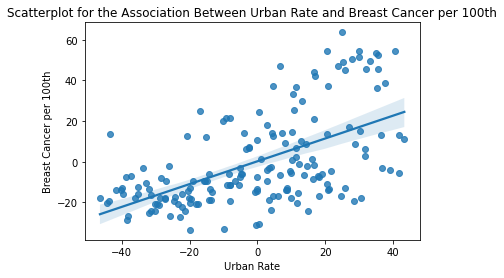

In [15]:
scat1 = sns.regplot(x=df_centered['urbanrate'], y=df_centered['breastcancerper100th'], scatter=True, data=df)
plt.xlabel('Urban Rate')
plt.ylabel('Breast Cancer per 100th')
plt.title ('Scatterplot for the Association Between Urban Rate and Breast Cancer per 100th')
print(scat1)


In [16]:
reg1 = smf.ols('breastcancerper100th ~ urbanrate', data=df_centered).fit()
print (reg1.summary())

                             OLS Regression Results                             
Dep. Variable:     breastcancerper100th   R-squared:                       0.325
Model:                              OLS   Adj. R-squared:                  0.321
Method:                   Least Squares   F-statistic:                     82.00
Date:                  Sun, 24 Jul 2022   Prob (F-statistic):           3.12e-16
Time:                          11:20:33   Log-Likelihood:                -746.80
No. Observations:                   172   AIC:                             1498.
Df Residuals:                       170   BIC:                             1504.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2570      1.427

The regression line used here is: Y =0.2570 + 0.5616Xi
The results of the linear regression model indicated that urban rate (Beta=0.56, p=.0001) was significantly and positively associated with breast cancer. 
